In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [5]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
168,169,Female,36,87,27
16,17,Female,35,21,35
122,123,Female,40,69,58
107,108,Male,54,63,46
118,119,Female,51,67,43


# Univariate Analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


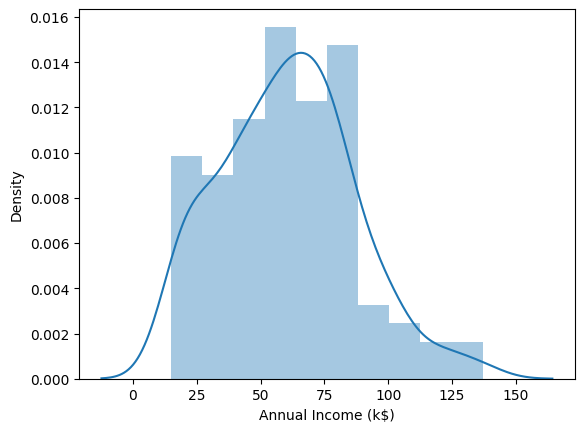

In [7]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

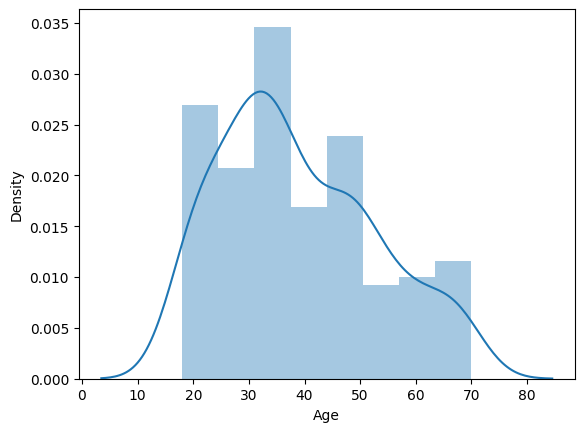

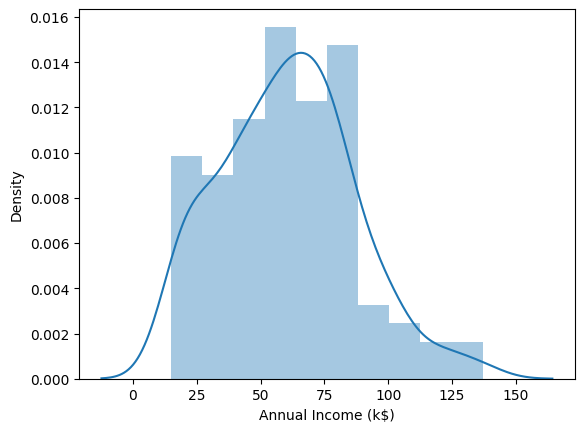

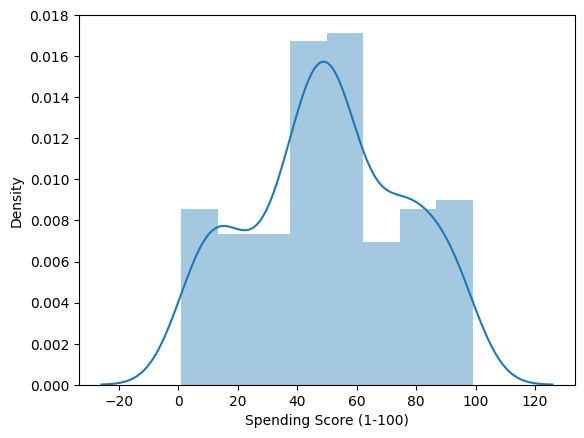

In [9]:
# function to plot the distribution for each of the numerical columns
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    

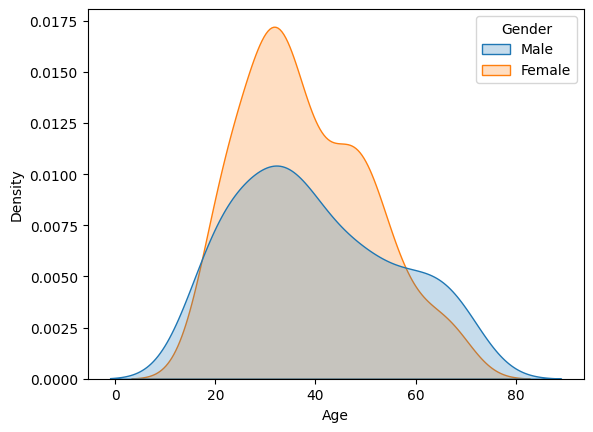

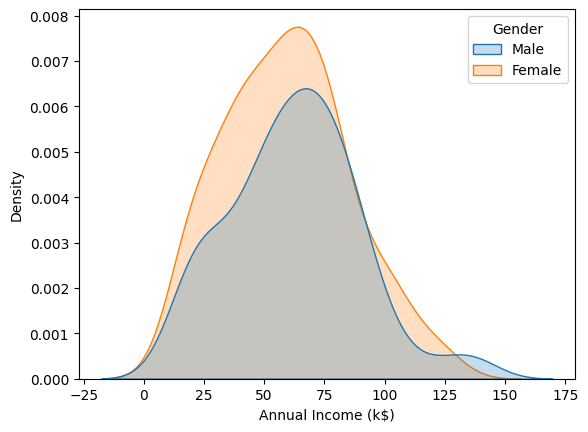

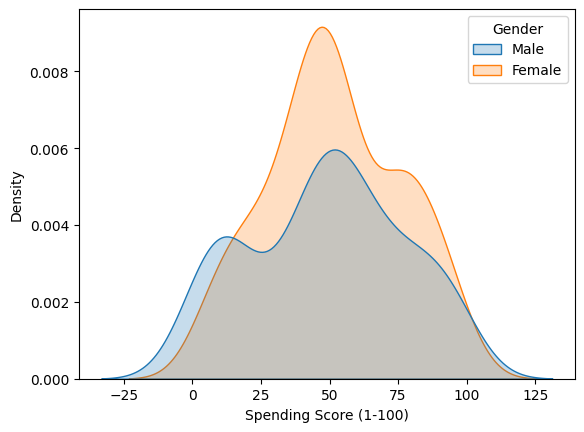

In [10]:
# function to plot a kde for each of the numerical columns
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, fill=True, hue='Gender');

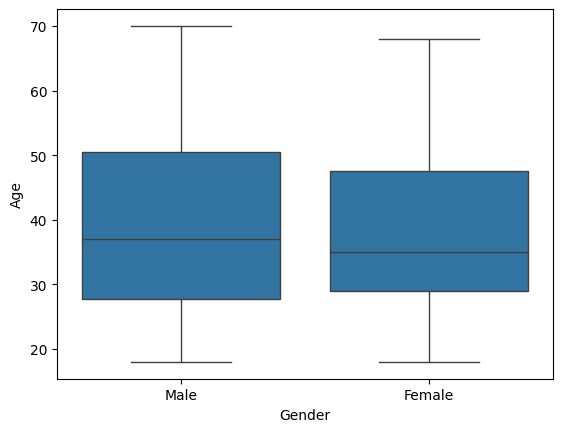

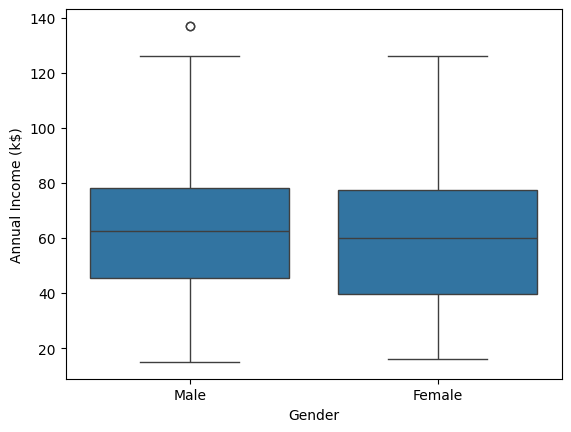

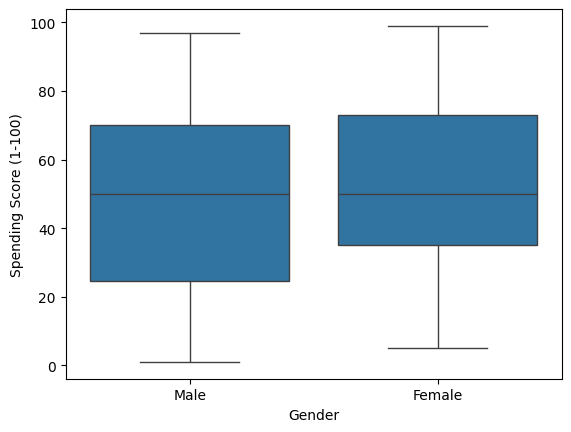

In [11]:
# draw a boxplot for each column
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i)

In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

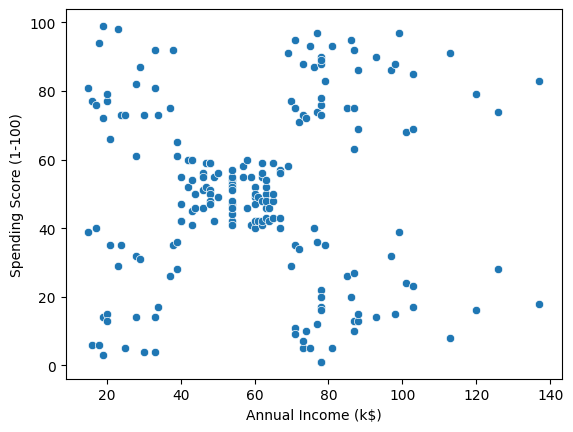

In [13]:
# draw a scatter plot 
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)');

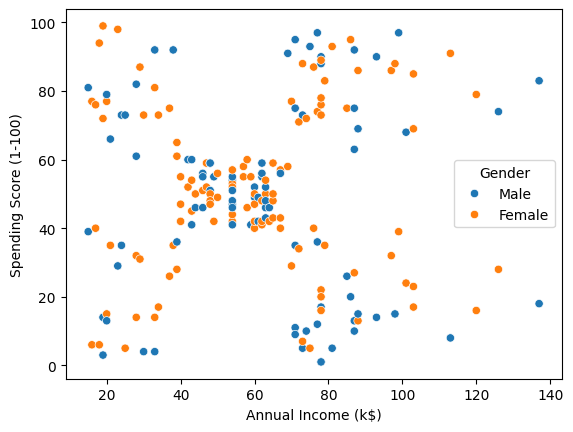

In [14]:
# draw a scatter plot 
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender');

In [15]:
# Getting rid of the customer ID column
df = df.drop('CustomerID', axis=1)

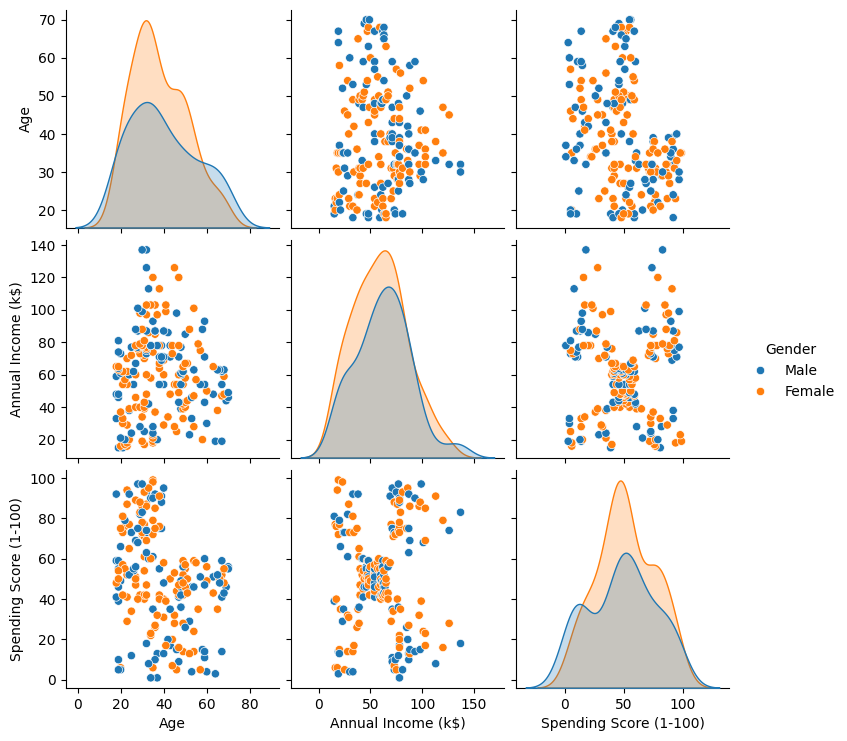

In [16]:
# look at a pairplot of the dataframe
sns.pairplot(df, hue='Gender')

In [17]:
# find the average age, income, and spending score by Gender
# df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


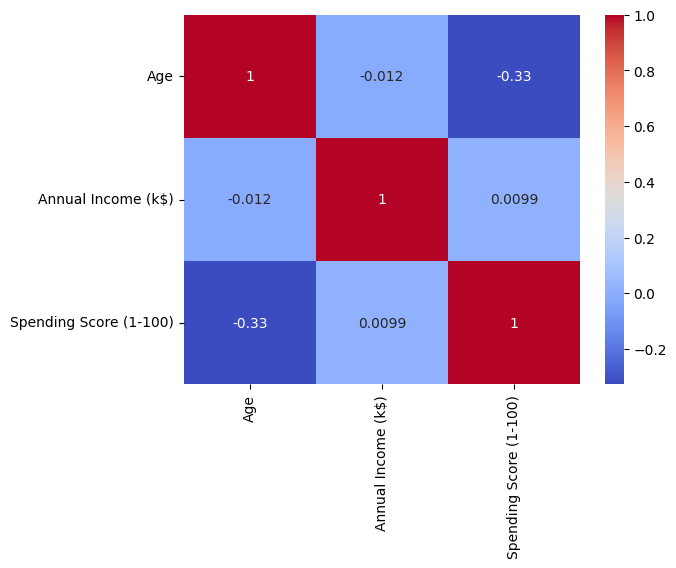

In [18]:
# find the correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

# Clustering: Univariate, Bivariate, Multivariate

## Univariate Clustering

In [19]:
# initiate Kmeans algorithm
clustering1 = KMeans(n_clusters=3)

In [20]:
# fit data to the algorithm
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
# look at the cluster labels
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
# add cluster labels to df
df['Income Cluster'] = clustering1.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,2
197,Male,32,126,74,2
198,Male,32,137,18,2


In [23]:
# find out how many belong to each cluster
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [24]:
# cluster inertia
clustering1.inertia_

23517.33093093093

In [25]:
# find the suitable number of clusters for the data set (using the elbow method)
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

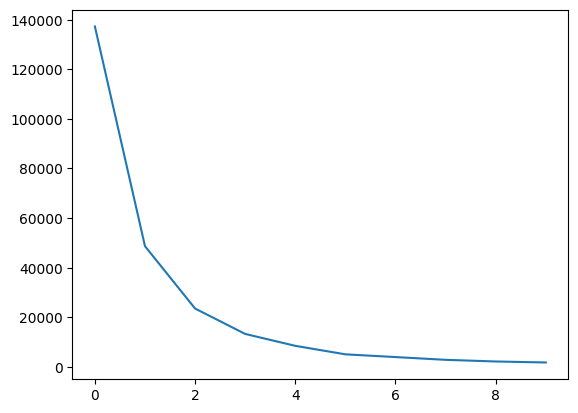

In [26]:
# plot the inertia values
plt.plot(inertia_scores);

In [27]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [28]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


## Bivariate Clustering

In [29]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Income and Spending Cluster'] = clustering2.labels_

In [30]:
# check the dataframe for the new column
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,1
4,Female,31,17,40,1,0


In [31]:
# find number of clusters
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

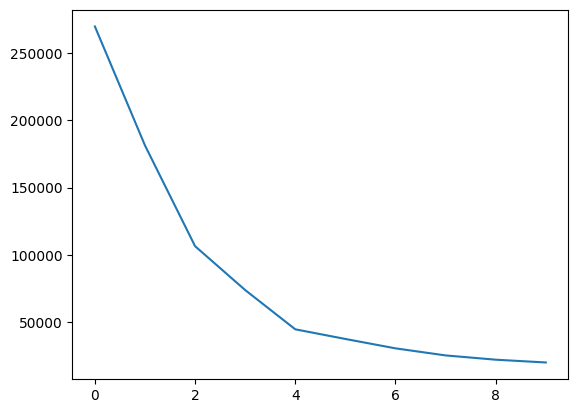

In [32]:
# plot the inertia values
plt.plot(inertia_scores2);

In [33]:
# find the centres of the clusters
centres = pd.DataFrame(clustering2.cluster_centers_)
centres.columns = ['x', 'y']

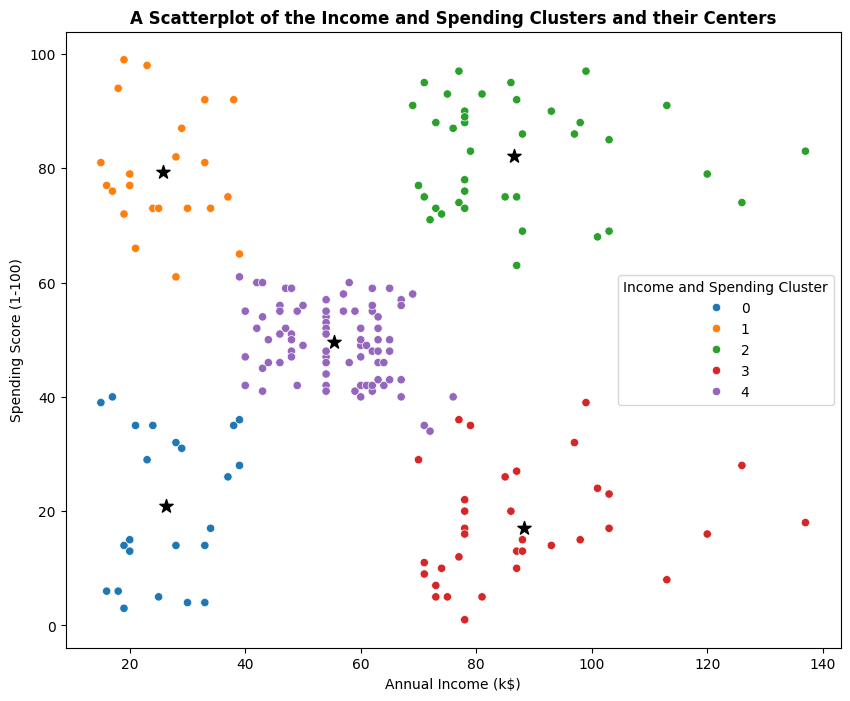

In [34]:
# visualise the clusters
plt.figure(figsize=(10,8))
plt.scatter(x=centres['x'], y=centres['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income and Spending Cluster', palette='tab10');
plt.title('A Scatterplot of the Income and Spending Clusters and their Centers', color='black', weight='bold');
# plt.savefig('clusters.png')

In [35]:
pd.crosstab(df['Income and Spending Cluster'], df['Gender'], normalize=True)

Gender,Female,Male
Income and Spending Cluster,,
0,0.070,0.045
1,0.065,0.045
2,0.105,0.090
3,0.080,0.095
4,0.240,0.165


In [36]:
df.groupby('Income and Spending Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Cluster,,,
0,45.217391,26.304348,20.913043
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,42.716049,55.296296,49.518519


## Multivariate Cluster

In [37]:
# import scaling function
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [38]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,1
4,Female,31,17,40,1,0


In [39]:
# get numeric values for gender
dff = pd.get_dummies(df, drop_first=True, dtype=int)
dff

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,1,1
2,20,16,6,1,0,0
3,23,16,77,1,1,0
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,2,2,0
196,45,126,28,2,3,0
197,32,126,74,2,2,1
198,32,137,18,2,3,1


In [40]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame(dff)
dff

,0,1,2,3,4,5
0,-1.424569,-1.738999,-0.434801,0.361741,-1.894622,1.128152
1,-1.281035,-1.738999,1.195704,0.361741,-1.178319,1.128152
2,-1.352802,-1.700830,-1.715913,0.361741,-1.894622,-0.886405
3,-1.137502,-1.700830,1.040418,0.361741,-1.178319,-0.886405
4,-0.563369,-1.662660,-0.395980,0.361741,-1.894622,-0.886405
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1.701520,-0.462016,-0.886405
196,0.441365,2.497807,-0.861839,1.701520,0.254288,-0.886405
197,-0.491602,2.497807,0.923953,1.701520,-0.462016,1.128152
198,-0.491602,2.917671,-1.250054,1.701520,0.254288,1.128152


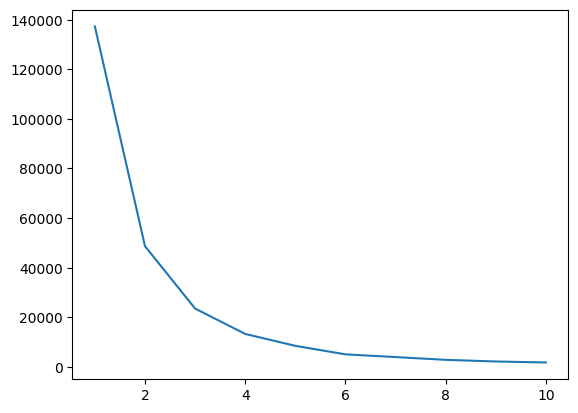

In [41]:
# find number of clusters
inertia_scores3 = []
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores);

In [42]:
# save a csv file of the dataframe
# df.to_csv('mall_customer_clusters.csv')